In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")



In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv",sep=",",na_values=".")
df



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
lencod=LabelEncoder()
df["Sex"]=lencod.fit_transform(df["Sex"])

import numpy as np
#df["Height"]=np.log(df["Height"])
df["Height"]=np.sqrt(df["Height"])
df.skew()



Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [7]:
df.describe()



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.369232,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.056436,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.339116,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.374166,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.406202,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.063015,2.825500,1.488000,0.760000,1.005000,29.000000


Sex                  Axes(0.125,0.653529;0.227941x0.226471)
Length            Axes(0.398529,0.653529;0.227941x0.226471)
Diameter          Axes(0.672059,0.653529;0.227941x0.226471)
Height               Axes(0.125,0.381765;0.227941x0.226471)
Whole weight      Axes(0.398529,0.381765;0.227941x0.226471)
Shucked weight    Axes(0.672059,0.381765;0.227941x0.226471)
Viscera weight           Axes(0.125,0.11;0.227941x0.226471)
Shell weight          Axes(0.398529,0.11;0.227941x0.226471)
Rings                 Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

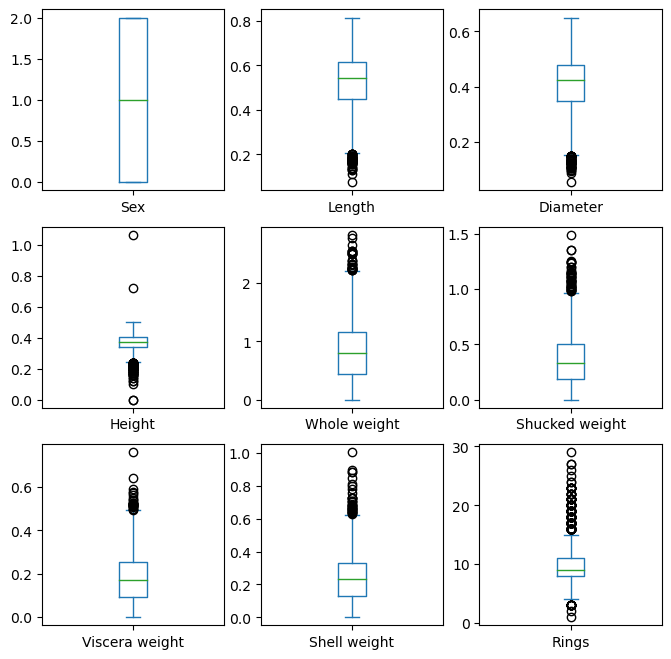

In [8]:
df.plot(kind="box",layout=(3,3),subplots=True,figsize=(8,8))


In [9]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.081207,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.226890,1.230277,1.170910,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.032048,0.309469,0.463500,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.277846,0.637819,0.648238,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.530942,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.655163,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.032048,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.480404,0.708212,0.748559,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.320164,0.541998,0.773341,0.733627,0.410739,0.020571


In [10]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [11]:
df.iloc[129, 7]

0.78